In [271]:
# Importing Library
import pandas as pd
import numpy as np

# Skicit-Learn Library
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Data Visualization library
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [272]:
# Function to plot the confusion Matrix
# Confusion Matrix func thanks to https://www.kaggle.com/pierra
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [273]:
pokedf = pd.read_csv(r'C:\Users\puter\OneDrive\Desktop\Python\dataset\pokemon.csv')
pokedf = pokedf[[ 'pokedex_number', 'name', 'attack', 'defense',  'hp',
       'sp_attack', 'sp_defense', 'speed','base_total','weight_kg','height_m','capture_rate',
       'generation', 'is_legendary']]
pokedf

,pokedex_number,name,attack,defense,hp,sp_attack,sp_defense,speed,base_total,weight_kg,height_m,capture_rate,generation,is_legendary
0,1,Bulbasaur,49,49,45,65,65,45,318,6.9,0.7,45,1,0
1,2,Ivysaur,62,63,60,80,80,60,405,13.0,1.0,45,1,0
2,3,Venusaur,100,123,80,122,120,80,625,100.0,2.0,45,1,0
3,4,Charmander,52,43,39,60,50,65,309,8.5,0.6,45,1,0
4,5,Charmeleon,64,58,58,80,65,80,405,19.0,1.1,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,101,103,97,107,101,61,570,999.9,9.2,25,7,1
797,798,Kartana,181,131,59,59,31,109,570,0.1,0.3,255,7,1
798,799,Guzzlord,101,53,223,97,53,43,570,888.0,5.5,15,7,1
799,800,Necrozma,107,101,97,127,89,79,600,230.0,2.4,3,7,1


In [274]:
print(pokedf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  801 non-null    int64  
 1   name            801 non-null    object 
 2   attack          801 non-null    int64  
 3   defense         801 non-null    int64  
 4   hp              801 non-null    int64  
 5   sp_attack       801 non-null    int64  
 6   sp_defense      801 non-null    int64  
 7   speed           801 non-null    int64  
 8   base_total      801 non-null    int64  
 9   weight_kg       781 non-null    float64
 10  height_m        781 non-null    float64
 11  capture_rate    801 non-null    object 
 12  generation      801 non-null    int64  
 13  is_legendary    801 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 87.7+ KB
None


In [275]:
pokedf[pokedf.weight_kg.isnull()]

,pokedex_number,name,attack,defense,hp,sp_attack,sp_defense,speed,base_total,weight_kg,height_m,capture_rate,generation,is_legendary
18,19,Rattata,56,35,30,25,35,72,253,NaN,NaN,255,1,0
19,20,Raticate,71,70,75,40,80,77,413,NaN,NaN,127,1,0
25,26,Raichu,85,50,60,95,85,110,485,NaN,NaN,75,1,0
26,27,Sandshrew,75,90,50,10,35,40,300,NaN,NaN,255,1,0
27,28,Sandslash,100,120,75,25,65,65,450,NaN,NaN,90,1,0
36,37,Vulpix,41,40,38,50,65,65,299,NaN,NaN,190,1,0
37,38,Ninetales,67,75,73,81,100,109,505,NaN,NaN,75,1,0
49,50,Diglett,55,30,10,35,45,90,265,NaN,NaN,255,1,0
50,51,Dugtrio,100,60,35,50,70,110,425,NaN,NaN,50,1,0
51,52,Meowth,35,35,40,50,40,90,290,NaN,NaN,255,1,0


In [276]:
# Imputing data and change type to desirable type

pokedf= pokedf.fillna(pokedf.mean())
pokedf.loc[773,'capture_rate']= 30
pokedf['capture_rate']= pokedf.capture_rate.astype('str').astype('int')

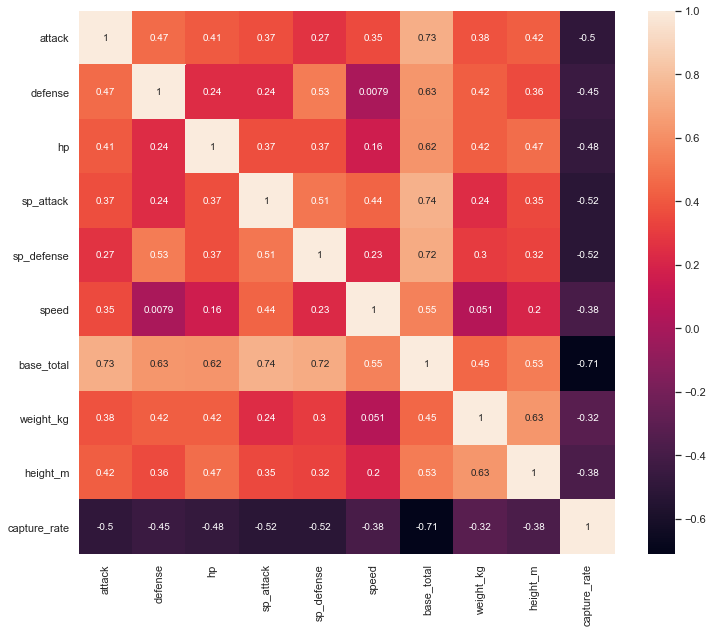

In [277]:
pokecorr=  pokedf[['attack', 'defense',  'hp',
       'sp_attack', 'sp_defense', 'speed','base_total','weight_kg','height_m','capture_rate']].corr()
f,ax = plt.subplots(figsize= (12,10))
sns.heatmap(pokecorr,annot= True)

In [278]:
#Until Generation 7 There is 801 Pokemon(serebii.net) and we need to check for duplicates

print(pokedf.shape)

pokedf.drop_duplicates(subset ="name", 
                     keep = 'first', inplace = True)
print(pokedf.shape)

(801, 14)
(801, 14)


In [279]:
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_palette('colorblind')

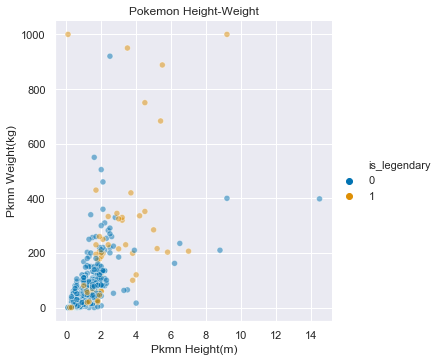

In [280]:
#Plotting Pkmn Weight - Height

g = sns.relplot(kind = 'scatter',data = pokedf, x ='height_m',y='weight_kg',hue='is_legendary',alpha= 0.5)
g.set(xlabel='Pkmn Height(m)',ylabel='Pkmn Weight(kg)',title='Pokemon Height-Weight')
plt.show()

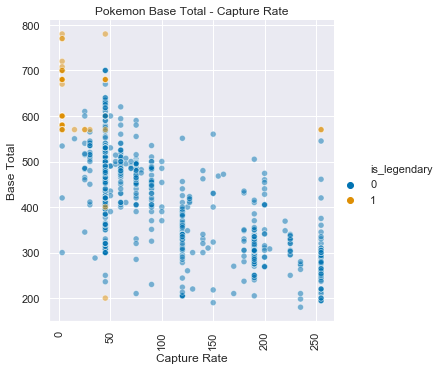

In [281]:
# Plotting Pokemon Base Total - Capture Rate

g = sns.relplot(kind = 'scatter',data = pokedf, x ='capture_rate',y='base_total',hue='is_legendary',alpha= 0.5)
g.set(xlabel='Capture Rate',ylabel='Base Total',title='Pokemon Base Total - Capture Rate')
g.set_xticklabels(rotation=90)
plt.show()

In [282]:
grouped= pokedf.groupby(['generation']).mean()
grouped

,pokedex_number,attack,defense,hp,sp_attack,sp_defense,speed,base_total,weight_kg,height_m,capture_rate,is_legendary
generation,,,,,,,,,,,,
1,76.0,74.529801,70.079470,64.344371,69.403974,67.741722,70.152318,416.251656,47.681496,1.232120,106.185430,0.033113
2,201.5,69.960000,71.790000,70.980000,65.400000,73.440000,61.610000,413.180000,49.105000,1.163000,91.900000,0.060000
3,319.0,77.185185,72.637037,65.666667,71.562963,69.392593,63.577778,420.022222,67.077778,1.229630,113.355556,0.074074
4,440.0,82.672897,76.168224,73.102804,74.635514,74.523364,70.074766,451.177570,76.885047,1.133645,78.859813,0.121495
5,571.5,80.557692,71.961538,70.314103,69.974359,67.711538,66.519231,427.038462,52.402564,1.032051,103.102564,0.083333
6,685.5,76.527778,73.555556,71.111111,76.569444,73.194444,66.652778,437.611111,52.352474,1.093943,100.402778,0.083333
7,761.5,84.637500,78.012500,70.575000,75.250000,75.650000,64.037500,448.162500,97.838476,1.285799,84.512500,0.212500


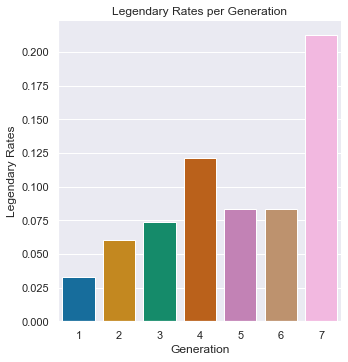

In [283]:
# Legendary Pokemon percentage per Generation

g = sns.catplot(kind ='bar', x =[1,2,3,4,5,6,7], y= 'is_legendary',data = grouped)
g.set(xlabel='Generation',ylabel='Legendary Rates',title='Legendary Rates per Generation')
plt.show()

In [284]:
#Preparing Data
X = pokedf[['base_total','weight_kg','height_m','capture_rate']].values
y = pokedf['is_legendary'].values

print("shape of Y :"+str(y.shape))
print("shape of X :"+str(X.shape))

scaler = RobustScaler()
X = scaler.fit_transform(X)

shape of Y :(801,)
shape of X :(801, 4)


In [285]:
#Splitting data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(y_train.shape))
print("shape of Y Test :"+str(y_test.shape))

shape of X Train :(600, 4)
shape of X Test :(201, 4)
shape of Y Train :(600,)
shape of Y Test :(201,)


In [286]:
# Find the best parameter

for this_C in [1,3,5,10,20,40,60,80,100]:
    model = SVC(kernel='linear',C=this_C).fit(X_train,y_train)
    scoretrain = model.score(X_train,y_train)
    scoretest  = model.score(X_test,y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.980000 , Test Score: 0.965174 

Linear SVM value of C:3, training score :0.978333 , Test Score: 0.965174 

Linear SVM value of C:5, training score :0.978333 , Test Score: 0.965174 

Linear SVM value of C:10, training score :0.978333 , Test Score: 0.965174 

Linear SVM value of C:20, training score :0.980000 , Test Score: 0.965174 

Linear SVM value of C:40, training score :0.980000 , Test Score: 0.965174 

Linear SVM value of C:60, training score :0.980000 , Test Score: 0.965174 

Linear SVM value of C:80, training score :0.980000 , Test Score: 0.965174 

Linear SVM value of C:100, training score :0.980000 , Test Score: 0.965174 



In [287]:
# Measuring our model

model = SVC(kernel='linear',C=20) 
model.fit(X_train,y_train)
scores = cross_val_score(model,X_test,y_test,cv=8)
scores.mean()

0.9701923076923077

In [288]:
pred = model.predict(X_test)

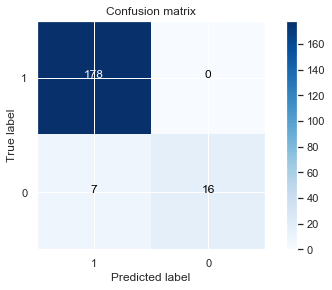

In [289]:
# Plot Confusion Matrix

class_names=np.array(['1','0'])

cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm,class_names)